In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.6.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

## Fig S1: Summary of the PubMed dataset

### Import

In [7]:
clean_df_updated_reparsed_filtered = pd.read_pickle(
    berenslab_data_path / "clean_df_updated_reparsed_filtered"
)

tcmalloc: large alloc 1073741824 bytes == 0x8c14fa000 @ 
tcmalloc: large alloc 1233903616 bytes == 0x96b48c000 @ 


In [8]:
all_abstracts = clean_df_updated_reparsed_filtered.AbstractText

In [9]:
date_year = np.load(variables_path / "date_year_reparsed.npy")

In [10]:
year_name_gender_first_author_df = pd.read_pickle(
    variables_path / "year_name_gender_first_author_df"
)
year_name_gender_last_author_df = pd.read_pickle(
    variables_path / "year_name_gender_last_author_df"
)

In [11]:
gender_first_author = year_name_gender_first_author_df.Gender.to_numpy()
names_first_author = year_name_gender_first_author_df.Names.to_numpy()

In [12]:
gender_last_author = year_name_gender_last_author_df.Gender.to_numpy()
names_last_author = year_name_gender_last_author_df.Names.to_numpy()

### Calculation

In [13]:
%%time
len_abstracts_characters = [len(x) for x in all_abstracts]

CPU times: user 4.41 s, sys: 488 ms, total: 4.9 s
Wall time: 4.91 s


In [14]:
%%time
len_abstracts_words = [len(elem.split()) for elem in all_abstracts]

CPU times: user 3min 8s, sys: 2.77 s, total: 3min 11s
Wall time: 3min 11s


In [15]:
len_abstracts_characters = np.array(len_abstracts_characters)
len_abstracts_words = np.array(len_abstracts_words)

#### (a)

In [16]:
bin_edges_characters = np.arange(230, 4000, 20)

In [17]:
%%time

counts_characters, bins_characters = np.histogram(
    len_abstracts_characters, bins=bin_edges_characters
)

CPU times: user 970 ms, sys: 922 µs, total: 971 ms
Wall time: 972 ms


#### (b)

In [18]:
bin_edges_words = np.arange(1, 724, 2)

In [19]:
%%time

counts_words, bins_words = np.histogram(
    len_abstracts_words, bins=bin_edges_words
)

CPU times: user 763 ms, sys: 117 µs, total: 763 ms
Wall time: 764 ms


#### (c)

In [20]:
unique_years, count_years = np.unique(
    date_year[(date_year >= 1970) & (date_year <= 2021)], return_counts=True
)

In [21]:
dates_available_names_first = date_year[names_first_author != ""]

In [22]:
unique_dates_available_first, number_available_names_first = np.unique(
    dates_available_names_first[
        (dates_available_names_first >= 1970)
        & (dates_available_names_first <= 2021)
    ],
    return_counts=True,
)

In [23]:
dates_available_names_last = date_year[names_last_author != ""]

In [24]:
unique_dates_available_last, number_available_names_last = np.unique(
    dates_available_names_last[
        (dates_available_names_last >= 1970)
        & (dates_available_names_last <= 2021)
    ],
    return_counts=True,
)

In [25]:
dates_predicted_names_first = date_year[gender_first_author != "unknown"]

In [26]:
unique_dates_predicted_first, number_predicted_names_first = np.unique(
    dates_predicted_names_first[
        (dates_predicted_names_first >= 1970)
        & (dates_predicted_names_first <= 2021)
    ],
    return_counts=True,
)

In [27]:
dates_predicted_names_last = date_year[gender_last_author != "unknown"]

In [28]:
unique_dates_predicted_last, number_predicted_names_last = np.unique(
    dates_predicted_names_last[
        (dates_predicted_names_last >= 1970)
        & (dates_predicted_names_last <= 2021)
    ],
    return_counts=True,
)

### Plot

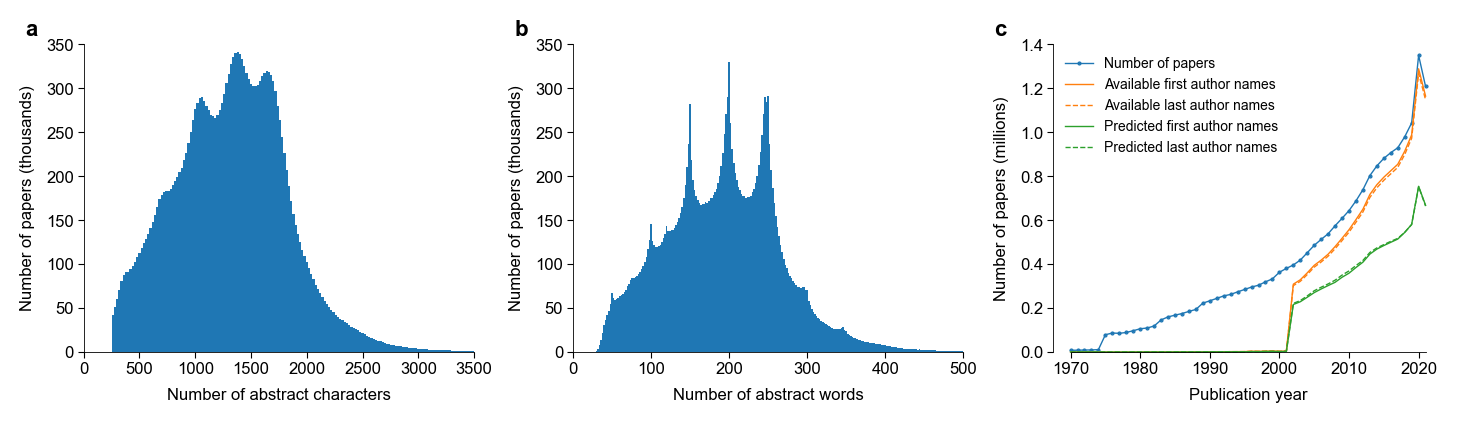

In [29]:
%matplotlib inline
txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

fig, ax = plt.subplots(1, 3, figsize=(7.2, 2), dpi=200, layout="constrained")

ax[0].hist(bins_characters[:-1], bins_characters, weights=counts_characters)
ax[0].set_ylabel("Number of papers (thousands)")
ax[0].set_xlabel("Number of abstract characters")
ax[0].set_yticks(np.arange(0, 400, 50) * 1000)
ax[0].set_yticklabels(np.arange(0, 400, 50))
ax[0].set_xlim(0, 3500)
ax[0].set_ylim(0, 350 * 1e3)
ax[0].text(
    -0.15,
    1.08,
    string.ascii_lowercase[0],
    transform=ax[0].transAxes,
    **txtkwargs
)

ax[1].hist(bins_words[:-1], bins_words, weights=counts_words)
ax[1].set_ylabel("Number of papers (thousands)")
ax[1].set_xlabel("Number of abstract words")
ax[1].set_yticks(np.arange(0, 400, 50) * 1000)
ax[1].set_yticklabels(np.arange(0, 400, 50))
ax[1].set_xlim(0, 500)
ax[1].text(
    -0.15,
    1.08,
    string.ascii_lowercase[1],
    transform=ax[1].transAxes,
    **txtkwargs
)


ax[2].plot(
    unique_years,
    count_years,
    ".-",
    label="Number of papers",
    markersize=1,
    clip_on=False,
)
ax[2].plot(
    unique_dates_available_first,
    number_available_names_first,
    "-",
    label="Available first author names",
    markersize=0.5,
    clip_on=False,
)
ax[2].plot(
    unique_dates_available_last,
    number_available_names_last,
    "--",
    c="tab:orange",
    label="Available last author names",
    markersize=1,
    clip_on=False,
)
ax[2].plot(
    unique_dates_predicted_first,
    number_predicted_names_first,
    "-",
    label="Predicted first author names",
    markersize=1,
    clip_on=False,
)
ax[2].plot(
    unique_dates_predicted_last,
    number_predicted_names_last,
    "--",
    c="tab:green",
    label="Predicted last author names",
    markersize=1,
    clip_on=False,
)
ax[2].legend()
ax[2].set_ylabel("Number of papers (millions)")
ax[2].set_xlabel("Publication year")
ax[2].set_yticks(np.arange(0, 1.6, 0.2) * 1e6)
ax[2].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax[2].set_ylim(0, 1.4e6)
ax[2].spines.bottom.set_bounds(1970, 2021)
ax[2].text(
    -0.15,
    1.08,
    string.ascii_lowercase[2],
    transform=ax[2].transAxes,
    **txtkwargs
)


fig.savefig(figures_path / "fig_S1_summary_data.pdf")
fig.savefig(figures_path / "fig_S1_summary_data.png")